<a href="https://colab.research.google.com/github/MatthewYancey/GANime/blob/master/src/process_frame_masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
import glob
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
IMAGE_ZIP = '/content/gdrive/MyDrive/repos/GANime/data_out/pokemon/test.zip'
IMAGE_INPUT_DIR = '/content/test_masks_input/'
TEMP_ZIP_FOLDER = '/content/test_masks/'
IMAGE_OUTPUT_DIR = '/content/gdrive/MyDrive/repos/GANime/data_out/pokemon/test_masks/'
HEIGHT = 288
WIDTH = 512
SINGLE_SIDE = 64

In [3]:
# unzips images
if os.path.exists(IMAGE_INPUT_DIR) == False:
    shutil.unpack_archive(IMAGE_ZIP, IMAGE_INPUT_DIR, 'zip')

In [4]:
# get the list of images
img_list = glob.glob(IMAGE_INPUT_DIR + '*')
print(f'Number of images: {len(img_list)}')

Number of images: 61426


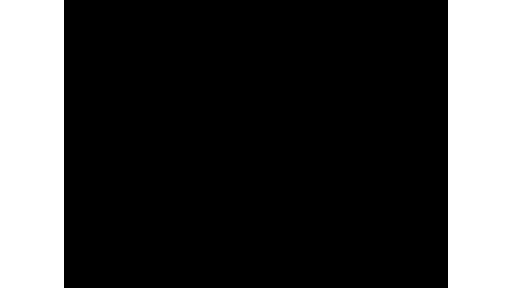

In [5]:
# makes a mask and saves it to correspond with the names of images
inside = np.zeros((HEIGHT, WIDTH - 2*SINGLE_SIDE, 3), np.uint8)
outsides = np.ones((HEIGHT, SINGLE_SIDE, 3), np.uint8) * 255
blank_image = cv2.hconcat([outsides, inside, outsides])
cv2_imshow(blank_image)

In [10]:
os.mkdir(TEMP_ZIP_FOLDER)

for image in img_list:
    new_name = os.path.basename(image).replace('.jpg', '')
    new_path = TEMP_ZIP_FOLDER + new_name
    # converts the image to png
    img = cv2.imread(image)
    cv2.imwrite(new_path + '.png', img)
    cv2.imwrite(TEMP_ZIP_FOLDER + new_name + '_mask.png', blank_image)

In [11]:
shutil.make_archive(IMAGE_OUTPUT_DIR, 'zip', TEMP_ZIP_FOLDER)

'/content/gdrive/MyDrive/repos/GANime/data_out/pokemon/test_masks.zip'